In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as py
import geonamescache
gc = geonamescache.GeonamesCache()
from unidecode import unidecode

In [15]:
df = pd.read_pickle("./data/headline_city_country")

In [16]:
gc.get_cities_by_name('Dallas')

[{'4684888': {'geonameid': 4684888,
   'name': 'Dallas',
   'latitude': 32.78306,
   'longitude': -96.80667,
   'countrycode': 'US',
   'population': 1300092,
   'timezone': 'America/Chicago',
   'admin1code': 'TX'}},
 {'5722064': {'geonameid': 5722064,
   'name': 'Dallas',
   'latitude': 44.91928,
   'longitude': -123.31705,
   'countrycode': 'US',
   'population': 15277,
   'timezone': 'America/Los_Angeles',
   'admin1code': 'OR'}}]

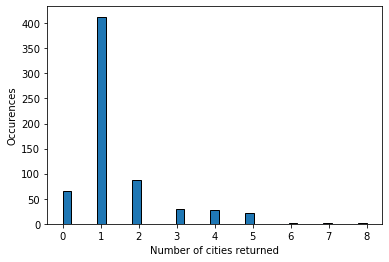

In [17]:
test = [x for x in df['City'] if len(gc.get_cities_by_name(x)) != 1 ]
num_results = [len(gc.get_cities_by_name(x)) for x in df['City']]
plt.hist(num_results, bins='auto', edgecolor='k')
plt.xlabel("Number of cities returned")
plt.ylabel("Occurences")
plt.show()

In [18]:
accented_cities = [ city['name'] for city in gc.get_cities().values() if unidecode(city['name']) != city['name']]
alternate_cityname = {unidecode(name): name for name in accented_cities}

#Test an example city known to have accents
print(f"Cordoba should be accented as {alternate_cityname['Cordoba']}")

Cordoba should be accented as Córdoba


In [19]:
def get_city_info(city):
    
    #Check and retrieve accented version of a city name if it has an accented version
    if city in alternate_cityname.keys():
        city = alternate_cityname[city]
    
    #Lookup city in geocachenames
    result = gc.get_cities_by_name(city)
    
    #Handle lookup results
    
    #If only 1 result returned
    if len(result) == 1:
        #Return that 1 result
        best_match = list(result[0].values())[0]
    
    #Else if more than 1 result returned
    elif len(result) > 1:
        #Return the best match by choosing the one with the biggest population
        best_match = list(max(result, key = lambda x: list(x.values())[0]['population'] ).values())[0]
    
    #Else no results were returned
    else:
        best_match = None

    #Process the result into a dictionary for output
    if best_match is not None:
        lat = best_match['latitude']
        long = best_match['longitude']
        countrycode = best_match['countrycode']
        city_info = {'Latitude':lat, "Longitude":long, "Country Code" : countrycode}
    else:
        city_info = None
    
    return(city_info)

In [20]:

#Test the function
get_city_info('Rio de Janeiro')

{'Latitude': -22.90642, 'Longitude': -43.18223, 'Country Code': 'BR'}

In [21]:

df['Latitude'] = df['City'].map(lambda x: get_city_info(x)['Latitude'] if get_city_info(x) else None)
df['Longitude'] = df['City'].map(lambda x: get_city_info(x)['Longitude'] if get_city_info(x) else None)
df['Country Code'] = df['City'].map(lambda x: get_city_info(x)['Country Code'] if get_city_info(x) else None)

In [22]:

print(f"{len(df[df['Latitude'].isnull() | df['Longitude'].isnull() | df['Country Code'].isnull()])} rows out of {len(df)} rows have no data for the new columns")

41 rows out of 650 rows have no data for the new columns


In [23]:
df.head(20)

,Headline,City,Country,Latitude,Longitude,Country Code
0,Zika Outbreak Hits Miami,Miami,None,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,None,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami Beach,None,25.79065,-80.13005,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Brazil,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,None,32.78306,-96.80667,US
5,Trinidad confirms first Zika case,Trinidad,None,-14.83333,-64.90000,BO
6,Zika Concerns are Spreading in Houston,Houston,None,29.76328,-95.36327,US
7,Geneve Scientists Battle to Find Cure,Geneve,None,46.20222,6.14569,CH
8,The CDC in Atlanta is Growing Worried,Atlanta,None,33.74900,-84.38798,US
9,Zika Infested Monkeys in Sao Paulo,Sao Paulo,None,-23.54750,-46.63611,BR
